# Preparation

## Load dataset and library

In [65]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [66]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/yodhasu/Data-Analytics/refs/heads/main/Assignment%201/data-2.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Exploratory Data Analysis (EDA)

In [67]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- InvoiceDate and CustomerID are of the wrong types.
- Description and CustomerID have missing values.
- Quantity and UnitPrice have negative values which is weird.

In [68]:
# count all unique values in each column
unique_counts = df.nunique()
unique_counts = unique_counts[unique_counts > 1]  # filter out columns with only one unique value
unique_counts = unique_counts.sort_values(ascending=False)  # sort by number of unique values
unique_counts

InvoiceNo      25900
InvoiceDate    23260
CustomerID      4372
Description     4223
StockCode       4070
UnitPrice       1630
Quantity         722
Country           38
dtype: int64

In [69]:
# only check for unique values in categorical feature (which is only Country)
df['Country'].value_counts().sort_index(ascending=False).head(10)

Country
Unspecified                446
United Kingdom          495478
United Arab Emirates        68
USA                        291
Switzerland               2002
Sweden                     462
Spain                     2533
Singapore                  229
Saudi Arabia                10
RSA                         58
Name: count, dtype: int64

- There's unspecified category in Country

# Processing

## Check for missing values

In [70]:
df_msn = pd.DataFrame(df.isna().sum())
df_msn['Features'] = df_msn.index
df_msn['MissingValues'] = df_msn[0]

In [71]:
df_msn['MissingValues']

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Name: MissingValues, dtype: int64

In [72]:
customer_null = (df['CustomerID'].isna().sum() / len(df['CustomerID'])) * 100
print(f"Percentage of missing values in CustomerID: {customer_null:.2f}%")

Percentage of missing values in CustomerID: 24.93%


In [73]:
description_null = (df['Description'].isna().sum() / len(df['Description'])) * 100
print(f"Percentage of missing values in Description: {description_null:.2f}%")

Percentage of missing values in Description: 0.27%


In [74]:
df[df['Description'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/2010 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/2010 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom


In [75]:
desc_null = df[df['Description'].isna()]

desc_null['UnitPrice'].value_counts().sort_index(ascending=False).head(10)

UnitPrice
0.0    1454
Name: count, dtype: int64

all UnitPrice where Description is null is 0.0 which means it is safe to remove

## Remove values

Need to be removed:
- null description
- null customer
- unspecified country

In [76]:
df.drop(df[df['CustomerID'].isna() | df['Description'].isna()].index, inplace=True)
df.drop(df.query('Country == "Unspecified"').index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406585 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406585 non-null  object 
 1   StockCode    406585 non-null  object 
 2   Description  406585 non-null  object 
 3   Quantity     406585 non-null  int64  
 4   InvoiceDate  406585 non-null  object 
 5   UnitPrice    406585 non-null  float64
 6   CustomerID   406585 non-null  float64
 7   Country      406585 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## Correcting datatype

In [77]:
# Converting InvoiceDate and CustomerID to datetime and int respectively
df = df.astype({'InvoiceDate':'datetime64[ns]','CustomerID':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406585 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406585 non-null  object        
 1   StockCode    406585 non-null  object        
 2   Description  406585 non-null  object        
 3   Quantity     406585 non-null  int64         
 4   InvoiceDate  406585 non-null  datetime64[ns]
 5   UnitPrice    406585 non-null  float64       
 6   CustomerID   406585 non-null  int64         
 7   Country      406585 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [78]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Check irregular quantity

In [79]:
df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Most of the negative quantity items have C on their invoice, check if this is true

In [80]:
negative_quantity = df[df['Quantity'] < 0]
negative_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8905 non-null   object        
 1   StockCode    8905 non-null   object        
 2   Description  8905 non-null   object        
 3   Quantity     8905 non-null   int64         
 4   InvoiceDate  8905 non-null   datetime64[ns]
 5   UnitPrice    8905 non-null   float64       
 6   CustomerID   8905 non-null   int64         
 7   Country      8905 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 626.1+ KB


In [81]:
contain_c = negative_quantity['InvoiceNo'].str.contains('C', na=False).sum()
int(contain_c)

8905

all items that has negative quantity has 'C' on their invoice number

## Add new columns

In [82]:
# Add a Revenue column
df['Revenue'] = abs(df['UnitPrice'] * df['Quantity'])
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [83]:
# Derive Date, Year, Month, Day, and Hour columns from the InvoiceDate column
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Date'] = df[['Month','Year']].astype(str).apply('-'.join, axis=1)
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

In [84]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Date,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,December-2010,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,December-2010,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,December-2010,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,December-2010,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,December-2010,Wednesday,8


# Analysis

In [85]:
# make sales data by removing cancelled orders (InvoiceNo contains 'C')
Sales = df[~df['InvoiceNo'].str.contains('C')]
Sales.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Date,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,December-2010,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,December-2010,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,December-2010,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,December-2010,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,December-2010,Wednesday,8


In [86]:
# count total revenue
total_revenue = Sales.groupby('Date', as_index=False)['Revenue'].sum().round(2)
order_list = ["05","09","01","13","03","02","08","07","04","06","12","11","10"]
total_revenue['Order'] = order_list
total_revenue.sort_values(by='Order', inplace=True)
total_revenue.reset_index(drop=True, inplace=True)
total_revenue.drop('Order', axis=1, inplace=True)
total_revenue.head(5)

,Date,Revenue
0,December-2010,572713.89
1,January-2011,569445.04
2,February-2011,447137.35
3,March-2011,595500.76
4,April-2011,468901.26


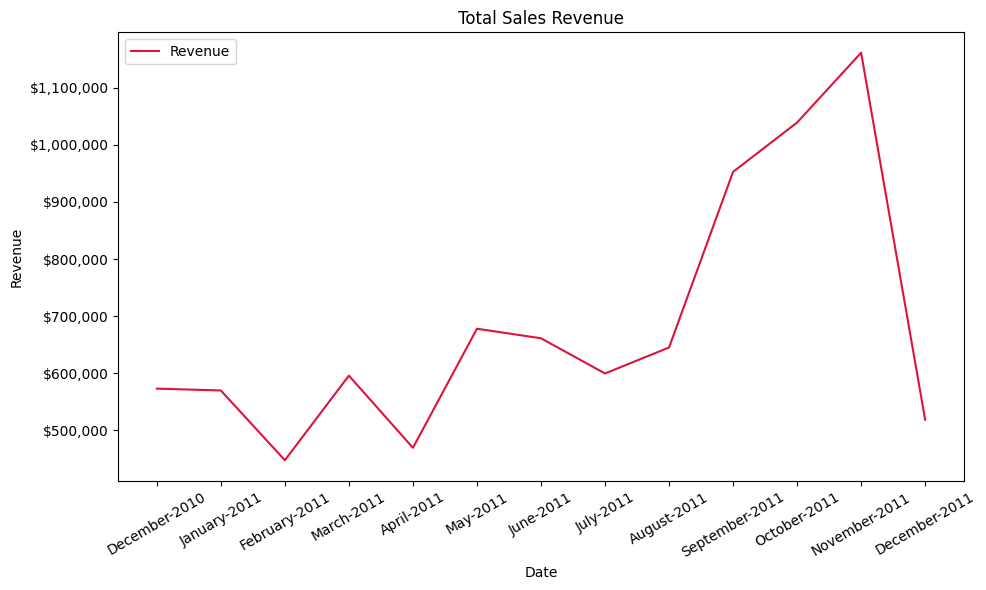

,Date,Revenue
0,December-2010,572713.89
1,January-2011,569445.04
2,February-2011,447137.35
3,March-2011,595500.76
4,April-2011,468901.26
5,May-2011,677741.88
6,June-2011,661027.91
7,July-2011,599292.53
8,August-2011,644812.87
9,September-2011,952838.38


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_revenue, x='Date', y='Revenue', color='crimson', label='Revenue')

plt.title('Total Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=30)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # Format y-axis with dollar sign

plt.legend()
plt.tight_layout()
plt.show()

total_revenue

,Country,Revenue
35,United Kingdom,7308391.55
23,Netherlands,285446.34
10,EIRE,265545.90
14,Germany,228867.14
13,France,209024.05
0,Australia,138521.31
30,Spain,61577.11
32,Switzerland,56443.95
3,Belgium,41196.34
31,Sweden,38378.33


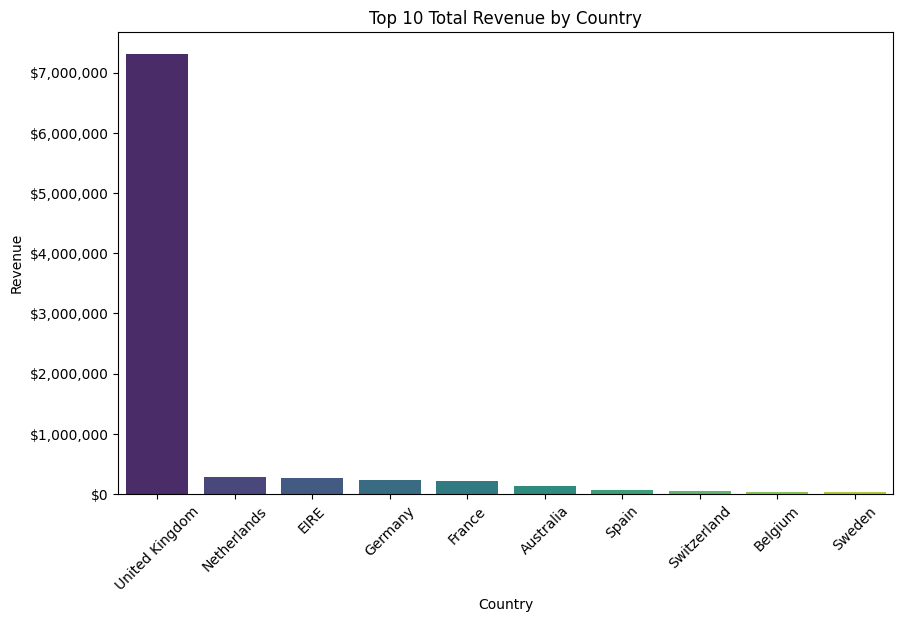

In [122]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

# top 10 total revenue by Country

# Count country revenue
country_revenue = Sales.groupby('Country', as_index=False)['Revenue'].sum().round(2)
country_revenue.sort_values(by='Revenue', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sns.barplot(data=country_revenue.head(10), x='Country', y='Revenue', palette='viridis')
plt.title('Top 10 Total Revenue by Country')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

country_revenue[:10]

,StockCode,Description,Revenue
2602,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1318,22423,REGENCY CAKESTAND 3 TIER,142567.45
3459,85123A,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3444,85099B,JUMBO BAG RED RETROSPOT,85220.78
2100,23166,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
3896,POST,POSTAGE,77803.96
2799,47566,PARTY BUNTING,68844.33
3278,84879,ASSORTED COLOUR BIRD ORNAMENT,56543.16
3894,M,Manual,53779.93
2006,23084,RABBIT NIGHT LIGHT,51346.20


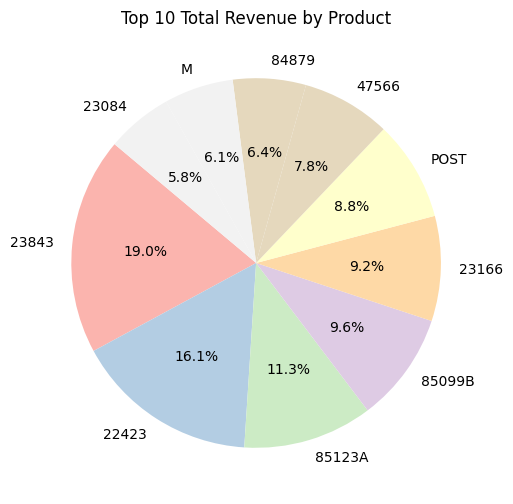

In [109]:
# top 10 products by revenue
product_revenue = Sales.groupby(['StockCode','Description'], as_index=False)['Revenue'].sum().round(2)
product_revenue.sort_values(by='Revenue', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

top_10_products = product_revenue.head(10)
labels = top_10_products['StockCode']
sizes = top_10_products['Revenue']

plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(labels))))
plt.title('Top 10 Total Revenue by Product')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

product_revenue.head(10)

,StockCode,Description,Quantity
2602,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2100,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
3020,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3444,85099B,JUMBO BAG RED RETROSPOT,46181
3459,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36725
3278,84879,ASSORTED COLOUR BIRD ORNAMENT,35340
432,21212,PACK OF 72 RETROSPOT CAKE CASES,33669
1108,22197,POPCORN HOLDER,30931
2006,23084,RABBIT NIGHT LIGHT,27202
1383,22492,MINI PAINT SET VINTAGE,26076


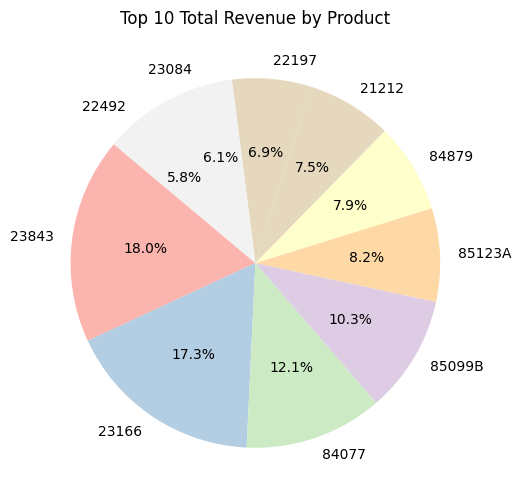

In [ ]:
# sales quantity by product
quantity_revenue = Sales.groupby(['StockCode','Description'], as_index=False)['Quantity'].sum().round(2)
quantity_revenue.sort_values(by='Quantity', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

top_10_quantity = quantity_revenue.head(10)
labels = top_10_quantity['StockCode']
sizes = top_10_quantity['Quantity']

plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(labels))))
plt.title('Top 10 Total Quantity by Product')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

quantity_revenue.head(10)

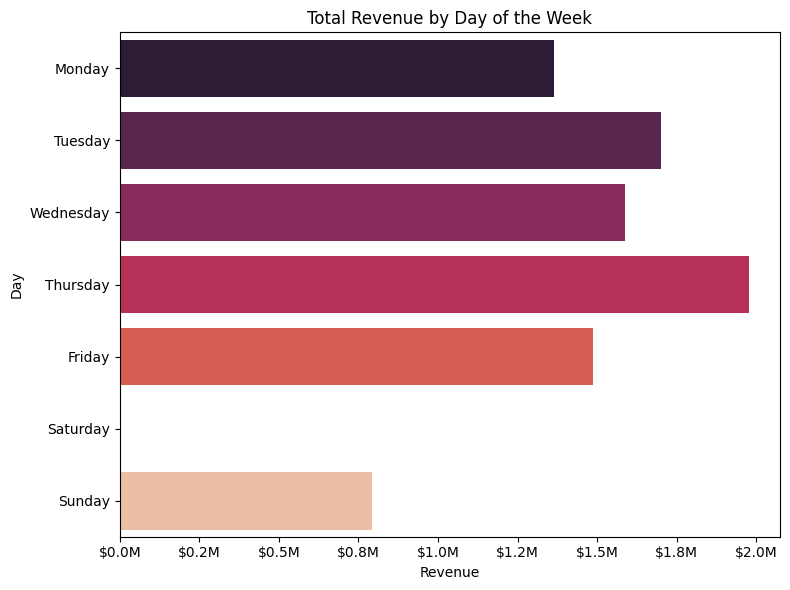

,Day,Revenue
1,Monday,1366130.501
4,Tuesday,1699781.951
5,Wednesday,1588336.170
3,Thursday,1976060.590
0,Friday,1485917.401
2,Sunday,792514.221


In [123]:
import matplotlib.ticker as ticker

# sales performance by Day of week
day_revenue = Sales.groupby('Day', as_index=False)['Revenue'].sum()
day_revenue['Day'] = pd.Categorical(day_revenue['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
day_revenue.sort_values(by='Day', inplace=True)

plt.figure(figsize=(8, 6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sns.barplot(data=day_revenue, y='Day', x='Revenue', palette='rocket')

plt.title('Total Revenue by Day of the Week')
plt.xlabel('Revenue')
plt.ylabel('Day')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.tight_layout()
plt.show()

day_revenue